In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.model_selection import train_test_split     # 划分训练测试集
from sklearn.preprocessing import PolynomialFeatures # 多项式回归
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

D:\Download\Anaconda\neirong\lib\site-packages\setuptools\_importlib.py:23: UserWarning: `importlib-metadata` version is incompatible with `setuptools`.
This problem is likely to be solved by installing an updated version of `importlib-metadata`.
  warnings.warn(msg)  # Ensure a descriptive message is shown.


In [2]:
import xgboost as xgb
from sklearn.metrics import f1_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
# 只调用sklearn 就行
from sympy import symbols, diff
# from pandas import diff
import matplotlib.pyplot as plt

# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
from statsmodels.graphics.api import qqplot
import statsmodels.tsa.stattools as st
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   时间      226 non-null    object
 1   新增      226 non-null    int64 
 2   总确诊     226 non-null    int64 
 3   治愈      226 non-null    int64 
 4   死亡      226 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.0+ KB


In [5]:
data = data['总确诊']

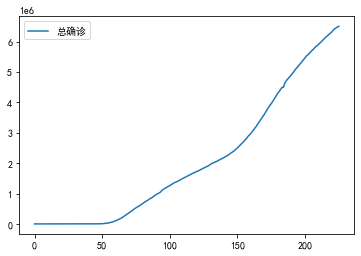

D:\Download\Anaconda\neirong\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
C:\Users\王浩\AppData\Roaming\Python\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
D:\Download\Anaconda\neirong\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':
D:\Download\Anaconda\neirong\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
D:\Download\Anaconda\neiron

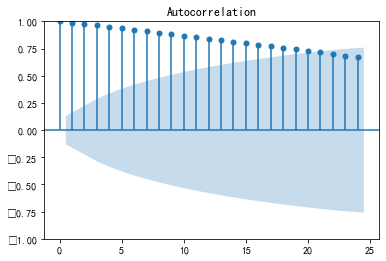

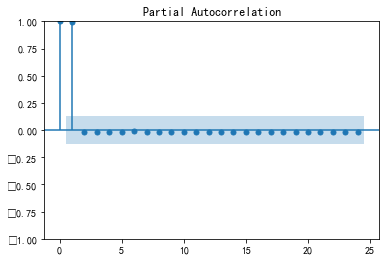

In [6]:
# 绘制时序图
# myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\STKAITI.ttf')
plt.rcParams['font.sans-serif'] = 'SimHei'
data.plot()
plt.legend()  
plt.show()

# 绘制自相关图
plot_acf(data).show()
# 自相关系数平稳，说明不稳定序列
# 绘制偏自相关图
plot_pacf(data).show()

In [13]:
adfuller(data)

(0.33855011021387665,
 0.9790456348968885,
 13,
 212,
 {'1%': -3.4615775784078466,
  '5%': -2.875271898983725,
  '10%': -2.5740891037735847},
 4406.89726675751)

In [24]:
difsales = diff(data) #一阶差分

In [32]:
np.isinf(difsales).sum()

0

(-2.0214761626674562, 0.2772366560681169, 12, 212, {'1%': -3.4615775784078466, '5%': -2.875271898983725, '10%': -2.5740891037735847}, 4385.121981945389)


D:\Download\Anaconda\neirong\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\Users\王浩\AppData\Roaming\Python\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
D:\Download\Anaconda\neirong\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


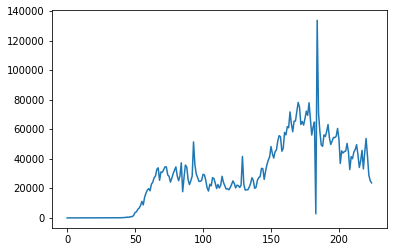

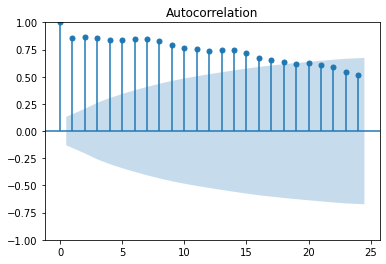

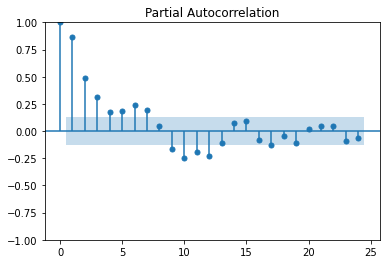

In [46]:
difsales = np.diff(a = data,n = 1) #一阶差分

difsales[np.isnan(difsales)] = 0
difsales[np.isinf(difsales)] = 0

# plt.plot.ts(difsales,xlab="时间",ylab="残差") #作时序图
plt.plot(difsales)
plot_acf(difsales).show()
# 自相关系数平稳，说明不稳定序列
# 绘制偏自相关图
plot_pacf(difsales).show()
print(adfuller(difsales))
# acf(difsales) #作自相关图

# unitrootTest(difsales) #单位根检验

(-2.744892413058301, 0.06658682690517959, 13, 210, {'1%': -3.461878735881654, '5%': -2.875403665910809, '10%': -2.574159410430839}, 4366.912537957796)


D:\Download\Anaconda\neirong\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\Users\王浩\AppData\Roaming\Python\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
D:\Download\Anaconda\neirong\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


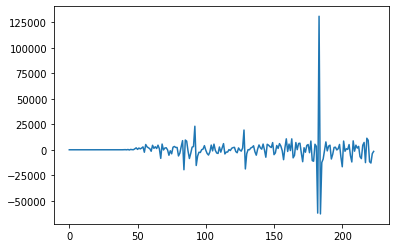

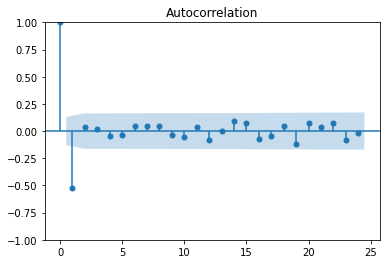

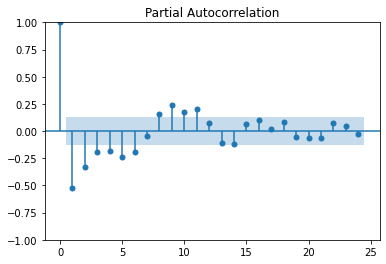

In [152]:
difsales = np.diff(a = data,n = 2) #二阶差分

difsales[np.isnan(difsales)] = 0
difsales[np.isinf(difsales)] = 0

# plt.plot.ts(difsales,xlab="时间",ylab="残差") #作时序图
plt.plot(difsales)
plot_acf(difsales).show()
# 自相关系数平稳，说明不稳定序列
# 绘制偏自相关图
plot_pacf(difsales).show()
print(adfuller(difsales))
# acf(difsales) #作自相关图

# unitrootTest(difsales) #单位根检验

In [55]:
arr_noise = generate_white_noise(difsales) # 一维数据，可以是白噪声或其他序列
ljungbox_result = acorr_ljungbox(arr_noise, lags=20)  # 返回统计量和p值，lags为检验的延迟数

IndexError: tuple index out of range

In [58]:
p_value = acorr_ljungbox(difsales, lags=[6,12]) 

In [59]:
p_value

,lb_stat,lb_pvalue
6,64.659948,5.061758e-12
12,68.536539,6.010437e-10


In [ ]:
说明是平稳非白噪声序列

In [101]:
order = st.arma_order_select_ic(data,max_ar=3,max_ma = 3,ic=['aic','bic','hqic'])
order.bic_min_order

C:\Users\王浩\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\王浩\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\王浩\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\王浩\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive

(2, 1)

In [158]:
mdl = sm.tsa.ARIMA(data, order=(2,0,0)).fit()

C:\Users\王浩\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


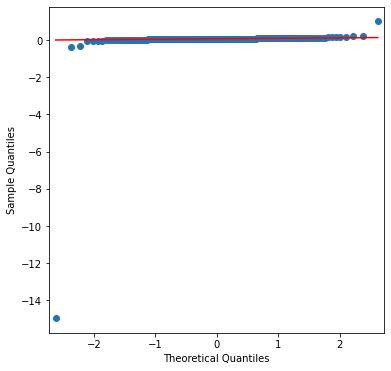

In [159]:
resid = mdl.resid
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
fig = qqplot(resid,line ='q',ax = ax,fit = True)
plt.show()

In [160]:
sm.stats.durbin_watson(resid.values)
# DW 检验越接近2 说明独立

1.013611337011945

In [161]:
p_value = acorr_ljungbox(data, lags=[6,12]) 

In [162]:
p_value

,lb_stat,lb_pvalue
6,1268.508745,7.107097e-271
12,2364.083398,0.000000e+00


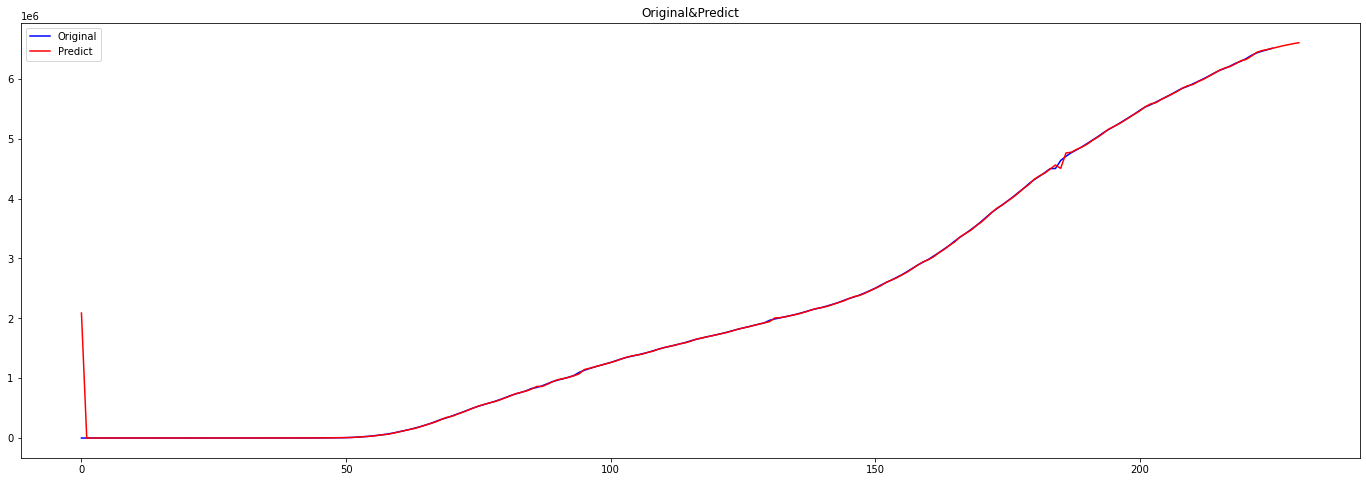

In [163]:
PREDICT_ARMA = mdl.predict(start = 0,end = 230)
# PREDICT_ARMA.index = PREDICT_ARMA.index +2020
plt.figure(figsize = (24,8))
orig = plt.plot(data,color = 'b',label = 'Original')
predict = plt.plot(PREDICT_ARMA,color = 'r',label = 'Predict')
plt.legend(loc = 'best')
plt.title('Original&Predict')
plt.show(block = False)

In [164]:
# 一阶差分还原
PREDICT = PREDICT_ARMA.add(data.shift(1))
# print(len(data))
PREDICT[226]=PREDICT_ARMA[226]
# PREDICT[226]=PREDICT_ARMA[226]+data[225]
print(PREDICT[226])
# 对数还原
# PREDICT = np.exp(PREDICT)
# PREDICT.dropna(inplace=True)

6531216.526327023


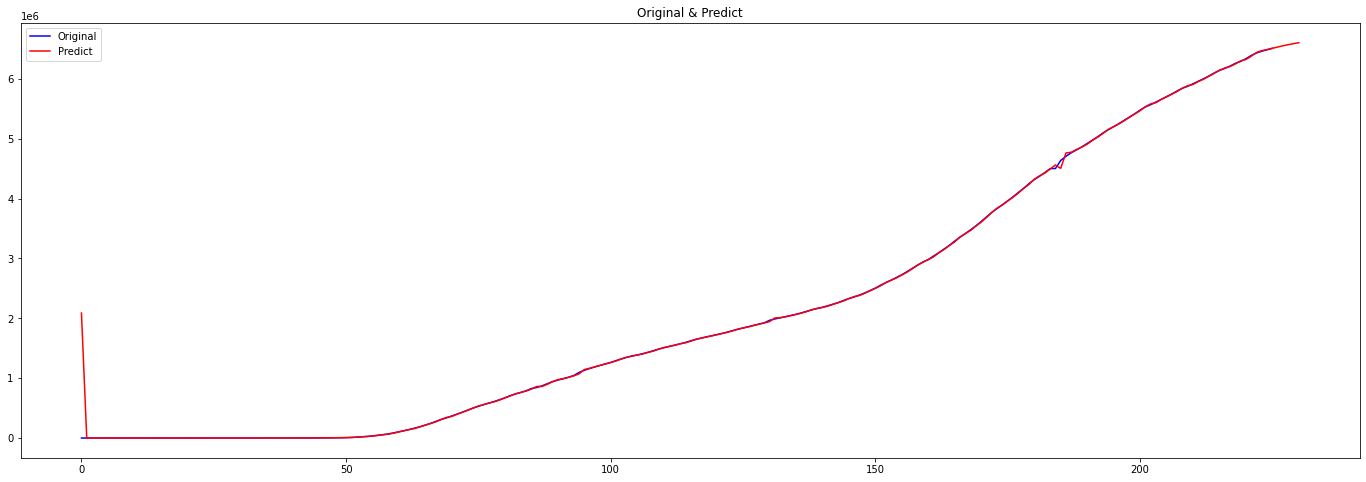

In [166]:
plt.figure(figsize = (24,8))
orig = plt.plot(data,color = 'b',label = 'Original')
predict = plt.plot(PREDICT_ARMA,color = 'red',label = 'Predict')
plt.legend(loc = 'best')
plt.title('Original & Predict')
plt.show(block = False)

In [179]:
y_pred = PREDICT_ARMA[0:226]

In [180]:
# x_test = np.arange(217,226).reshape(-1,1)
# y_pred = regr.predict(x_test)

print('均方差： %.2f' % mean_squared_error(data,y_pred))
print('决定系数： %.4f' % r2_score(data,y_pred))

均方差： 19412192790.92
决定系数： 0.9955


In [44]:
DataFrame.diff??

Object `DataFrame.diff` not found.


In [ ]:
# xgboost

In [22]:
X_cols = [col for col in data.columns if col not in ['时间','新增']]
X = data[X_cols]
y = data['新增']

In [23]:
X_train,x_var,y_train,y_var = train_test_split(X,y,test_size = 0.25,random_state = 10)
mdl = xgb.XGBRegressor(n_estimators = 100,max_depth = 5,colsample_bytree = 0.5,subsample = 0.5,
                       learning_rate = 0.2)
mdl.fit(X_train,y_train)
y_pred = mdl.predict(x_var)

In [24]:
y_pred

array([3.34613984e+04, 1.99111443e+01, 2.47970566e+04, 3.45867031e+04,
       2.53566855e+04, 3.14276445e+04, 1.93527637e+04, 1.12988125e+04,
       3.32780781e+04, 4.18038438e+04, 3.95489805e+04, 5.88673086e+04,
       2.53859531e+04, 3.19283242e+04, 6.00587852e+04, 2.35714805e+04,
       8.51216504e+03, 2.64969277e+04, 2.78152031e+04, 5.40747500e+04,
       1.09178333e+03, 2.38843320e+04, 5.01527031e+04, 2.00594199e+04,
       4.09208359e+04, 2.75394609e+04, 1.77109795e+01, 1.97741270e+04,
       2.74796028e+01, 1.77109795e+01, 5.82265312e+04, 6.06587812e+04,
       4.79995625e+04, 1.89915100e+02, 6.65147812e+04, 4.21616133e+04,
       6.82503203e+04, 2.04639160e+04, 1.11245557e+04, 7.17313359e+04,
       1.77109795e+01, 2.20178555e+04, 1.51612978e+01, 2.17651113e+04,
       3.22143164e+04, 7.39039219e+04, 5.26585742e+04, 1.51612978e+01,
       1.51612978e+01, 7.99810693e+03, 7.51003418e+03, 1.49944277e+01,
       8.51216504e+03, 4.13799835e+02, 1.49944277e+01, 2.47451074e+04,
      

In [30]:
c = r2_score(y_var,y_pred)
# print(c)
print ('R2:%.3f '%(c)) 
result= cross_val_score(mdl,x_var,y_var) 
print ('MSE:%.3f (%.3f)'%(result.mean(), result.std())) 

R2:0.962 
MSE:0.885 (0.112)


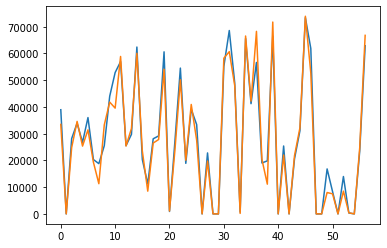

In [29]:
# plt.scatter(y_test,y_pred)
plt.plot(range(len(y_var)),y_var)
plt.plot(range(len(y_pred)),y_pred)
# plt.plot(X_test,y_pred)

In [5]:
cols = [col for col in data.columns if col != '时间' and col != '新增']

In [85]:
cols

['总确诊', '治愈', '死亡']

In [6]:
X = data[cols]
y = pd.DataFrame(data['新增'])
X_train = X.iloc[0:166]
y_train = X.iloc[166:226]
X_test = y.iloc[0:166]
y_test = y.iloc[166:226]


In [7]:
X = data[cols]

In [128]:
X.head()

,总确诊,治愈,死亡
0,5,0,0
1,5,0,0
2,6,0,0
3,6,0,0
4,7,0,0


In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
y = pd.DataFrame(data['新增'])

In [131]:
type(y)

pandas.core.frame.DataFrame

In [132]:
y.head()

,新增
0,0
1,0
2,1
3,0
4,1


In [10]:
X_train = X.iloc[0:166]
y_train = X.iloc[166:226]

In [11]:
X_test = y.iloc[0:166]
y_test = y.iloc[166:226]

In [178]:
X_train.size

498

In [179]:
X_test.size

166

In [135]:
X.size

678

In [136]:
y.size


226

In [95]:
X_train.head(10)

,总确诊,治愈,死亡
70,369069,20003,11018
4,7,0,0
31,60,3,0
164,3219999,1426428,135822
108,1457593,318027,86912
58,69223,619,1054
195,5199444,2664701,165617
41,582,10,22
135,2066401,808494,115130
175,3961429,1849989,143834


In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,X_test)

LinearRegression()

In [14]:
train_score = model.score(X_train,X_test)

In [15]:
cv_score = model.score(y_train,y_test)

In [16]:
print('train_score:{0:0.6f};cv_score:{1:.6f}'.format(train_score,cv_score))

train_score:0.912925;cv_score:-52.736267


In [17]:
y_pred = model.predict(y_train)

In [147]:
X_test.size

166

In [148]:
y_test.size

60

In [149]:
y_pred.size

60

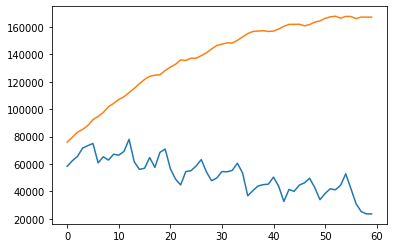

In [18]:
# plt.scatter(y_test,y_pred)
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_pred)),y_pred)
# plt.plot(X_test,y_pred)

In [ ]:
线性回归模型不好

In [38]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
 
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4), dpi=200)
title = 'Learning Curves (degree={0})'
degrees = [1, 2, 3]
 
start = time.clock()
plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, polynomial_model(degrees[i]),
        title.format(degrees[i]), X, y, ylim=(0.01, 1.01), cv=cv)
 
print('elaspe: {0:.6f}'.format(time.clock()-start))

ModuleNotFoundError: No module named 'common'

In [40]:
 def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression(normalize=True)
#     pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

In [159]:
model = polynomial_model(degree=2)       # 二阶多项式
 
# start = time.clock()
model.fit(X_train, X_test)
 
train_score = model.score(X_train, X_test)
cv_score = model.score(y_train, y_test)
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))


train_score: 0.970438; cv_score: -1741.482052


D:\Download\Anaconda\neirong\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [160]:
y_pred = model.predict(y_train)

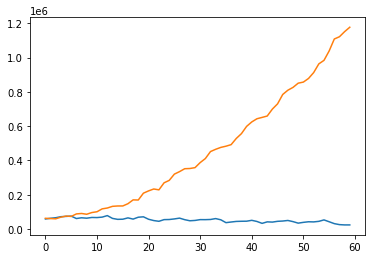

In [164]:
# plt.scatter(y_test,y_pred)
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_pred)),y_pred)
# plt.plot(X_test,y_pred)

In [73]:
from common.utils import plot_learning_curve


ModuleNotFoundError: No module named 'common'

In [48]:
y

,新增
0,0
1,0
2,1
3,0
4,1
...,...
221,42095
222,31110
223,25325
224,23640


In [60]:
fig = plt.figure(figsize = (10,8),dpi = 200 )

<Figure size 2000x1600 with 0 Axes>

In [56]:
n_splits = 200
seed = 7
kfold = KFold(n_splits = n_splits,random_state = seed,shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model,X,y,cv = kfold,scoring = scoring)
print('Linear Regression:%.3f'% result.mean())

Linear Regression:-99300422.893


In [63]:
data.columns

Index(['时间', '新增', '总确诊', '治愈', '死亡'], dtype='object')

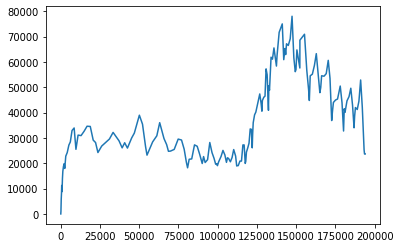

In [72]:
# figure = 
plt.plot(data['死亡'],data['新增'])
# plt.plot(data['总确诊'],data['新增'])
# plt.plot(data['治愈'],data['新增'])

# plt.plot(x,data['死亡'])

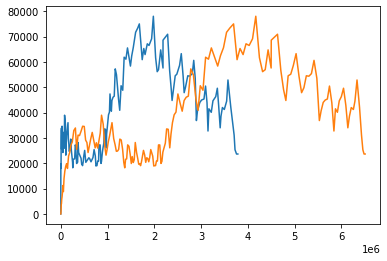

In [71]:
plt.plot(data['治愈'],data['新增'])
plt.plot(data['总确诊'],data['新增'])


In [198]:
#多项式回归       
def Polynomial_Regression(name, train, test):
    poly = PolynomialFeatures(degree = 6)
    x = np.arange(0, 166)
    X = x.reshape(-1, 1)
    poly.fit(X)
    X1 = poly.transform(X)
    lin_reg1 = LinearRegression()
    lin_reg1.fit(X1, train)
    y_pred = lin_reg1.predict(X1)
    plt.plot(x, y_pred, c = 'r')
    
    plt.title(name)
#     plt.scatter(x,train)
    plt.xlabel('天数')
    plt.ylabel('人数')
    plt.show()
    #评估 预测
    poly = PolynomialFeatures(degree = 6)
    x_test = np.arange(166, 226)
    X_test = x_test.reshape(-1,1)
    poly.fit(X_test)
    X2 = poly.transform(X_test)
    y_test = lin_reg1.predict(X2)
    print('均方差： %.2f' % mean_squared_error(test,y_test))
    print('决定系数： %.2f' % r2_score(test,y_test))

In [208]:
data = pd.read_csv('data.csv')

X = data[cols]
y = pd.DataFrame(data['新增'])
train = X.iloc[0:166]
test = X.iloc[166:226]
train_pred = y.iloc[0:166]
test_pred = y.iloc[166:226]


In [191]:
X_train.size

498

In [192]:
X_test.size

166

In [206]:
from sklearn import linear_model
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error,r2_score

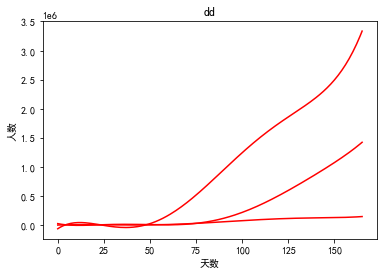

均方差： 22949847148574.36
决定系数： -338.06


In [209]:
Polynomial_Regression('dd',train,test)

[[-0.16398104]
 [ 0.32254183]
 [ 0.17992574]
 [ 0.27241355]
 [ 0.42091826]
 [17.22642756]]


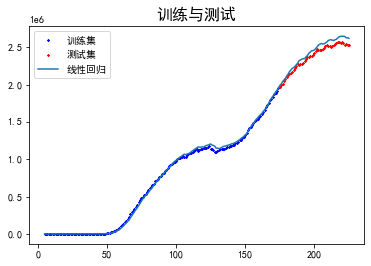

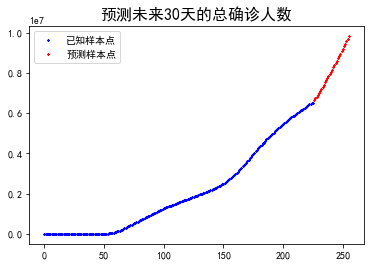

In [210]:
import numpy as np
from numpy import *
from scipy import linalg
from scipy.optimize import curve_fit
from xlrd import open_workbook
import matplotlib.pyplot as plt
from datetime import datetime

# 获取列的函数
# 返回列的名字
def getcolumn(table, i):
    res = []
    for val in table.col_values(i):
        if i == 0:
            if len(val) != 2:
                date = val.split('.')
                res.append(datetime(int(date[0]), int(date[1]), int(date[2])))
        else:
            try:
                res.append(int(val))
            except:
                continue
    return res

#标准线性回归函数
def standRegres(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    #判断行列式为零，则无法求逆
    if linalg.det(xTx) == 0:
        print('the matrix is singular, cannot do inverse')
        return
    ws = (xTx).I * (xMat.T*yMat)
    return ws

# 根据拟合出的系数计算对应的y值
def linearFunc(ws, xArr):
    ws = [item[0] for item in ws.tolist()]
    return sum(np.array(ws[:5])*np.array(xArr)) + ws[-1:][0]

# 指数函数，用于拟合变化率
def ExponentialFunction(x, a, b, c):
    return a * np.exp(-b * x) + c

# 划分数据集的函数
def splitDataset(x, y, test_size = 0.2):
    num = len(y)
    train_number = round(num*(1-test_size))
    X_train = x[0:train_number]
    Y_train = y[0:train_number]
    X_test = x[train_number:]
    Y_test = y[train_number:]
    return X_train, X_test, Y_train, Y_test

# 获取数据
original_data = open_workbook(r'D:\Desktop\课程ppt\大三上\大数据\date\Regression_prediction\data.xlsx')  # 打开文件
table = original_data.sheets()[0]
col1 = getcolumn(table, 1)
col2 = getcolumn(table, 2)
col3 = getcolumn(table, 3)
col4 = getcolumn(table, 4)
alive = (array(col2) - array(col3) - array(col4)).tolist()
quantity = len(col1)
index = range(quantity)

# 回归获取系数（对现存确诊进行预测）
xArr = [alive[i:i+5] for i in range(quantity-5)] # 每五个划分为一个列表（注意最后一组没有对应的y，因此range(quantity-5)，而不是range(quantity-4)）
xArr = append(xArr, ones((len(xArr), 1)), axis=1).tolist() # 为每个项添加 1
xArr = [[int(i) for i in item] for item in xArr] # 将浮点转为整数
yArr = [alive[i] for i in range(5, quantity)]

X_train, X_test, Y_train, Y_test = splitDataset(xArr, yArr, 0.23) # 划分数据集
ws = standRegres(X_train, Y_train) # 系数
print(ws)
# """
# 绘图显示效果
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat*ws

plt.plot(index[5:len(Y_train)+5], Y_train, 'b*', markersize = '2')
plt.plot(index[len(Y_train)+5:], Y_test, 'r*', markersize = '2')
plt.plot(index[5:], yHat)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.legend(["训练集", "测试集", "线性回归"])
plt.title("训练与测试", fontsize = '16')
plt.show()
# """

# 设置预测的天数，于此修改，下面预测的天数都会修改
predict_days = 30

# -------- 治愈率预测 --------
rate_recovery = [(col3[i + 1] - col3[i]) / alive[i] for i in range(len(col3)-1)]
rate_recovery = np.array(rate_recovery) # 治愈率 = (当日治愈总数 - 前日治愈总数)/前日现存确诊人数
idx_notzero = np.where((rate_recovery != 0) & (rate_recovery < 0.075))[0] # 去掉前面误差较大的点（最开始治愈率低是因为未找到治愈方式）
# idx_notzero = [idx_notzero[i] for i in range(0, len(idx_notzero))]
rate_recovery_discretization = [rate_recovery[i] for i in idx_notzero]
popt, pcov = curve_fit(ExponentialFunction, idx_notzero, rate_recovery_discretization, bounds=([0, -1, 0], [np.inf, 0, 50])) # 指数函数拟合
predict_recovery_rate = ExponentialFunction(range(len(index), len(index)+predict_days), popt[0], popt[1], popt[2]) # 预测未来一个月的治愈率

# -------- 死亡率预测 --------
rate_death = [(col4[i + 1] - col4[i]) / alive[i] for i in range(len(col4) - 1)]
rate_death = np.array(rate_death) # 死亡率 = (当日死亡总数 - 前日死亡总数)/前日现存确诊人数
idx_notzero = np.where((rate_death != 0))[0] # 去掉前面误差较大的点
idx_notzero = [idx_notzero[i] for i in range(0, len(idx_notzero))]
rate_death_discretization = [rate_death[i] for i in idx_notzero]
popt, pcov = curve_fit(ExponentialFunction, idx_notzero, rate_death_discretization, bounds=([0, 0, 0], [np.inf, 1, 10])) # 指数函数拟合
predict_death_rate = ExponentialFunction(range(len(index), len(index)+predict_days), popt[0], popt[1], popt[2]) # 预测未来一个月的死亡率


# 变量准备
allpatients = col2.copy()
currentpatients = alive.copy()
predict_allpatients = []
predict_currentpatients = []
predict_recovery_rate
predict_death_rate
predict_recovery = col3[-1:]
predict_death = col4[-1:]

# 开始迭代
for i in range(predict_days):
    predict_recovery.append(predict_recovery[i] + predict_recovery_rate[i] * alive[-1:][0])
    predict_death.append(predict_death[i] + predict_death_rate[i] * alive[-1:][0])
    currentpatients.append(linearFunc(ws, currentpatients[-5:]))
    predict_currentpatients.append(currentpatients[-1:][0])
    allpatients.append(currentpatients[-1:][0] + predict_recovery[-1:][0] + predict_death[-1:][0])
    predict_allpatients.append(allpatients[-1:][0])

plt.plot(range(quantity), allpatients[:-predict_days], 'b*', markersize = '2')
plt.plot(range(quantity, quantity+predict_days), predict_allpatients, 'r*', markersize = '2')
plt.legend(["已知样本点", "预测样本点"])
plt.title("预测未来" + str(predict_days) + "天的总确诊人数", fontsize = '16')
plt.show()
